# Welcome to Assignment 1 on course CV_CSL442_S21

## <span style='color:red'> ***Instructions:***</span>
#### <span style='color:red'>1. Use Python 3.x, jupyter notebook to run this notebook.</span>
#### <span style='color:red'>2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE' you sould not change anything else code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.</span>
#### <span style='color:red'>3. Read documentation of each function carefully.</span>
#### <span style='color:red'>4. Out of 7 questions we consider best 5 for the evaluation purpose.</span>
#### <span style='color:red'>5. Copying assignment solutions from others is strongly discouraged and will be considered as violation of academic code of conduct.</span>
#### <span style='color:red'>6. Early submitted assignment solutions will be considered for evaluation, so students please check your solutions carefully before submission.</span>
#### <span style='color:red'>7. Required two items for submission:</span>
    1. Solutions jupyter notebook file.
    2. Link to the recorded video of your program explanation and output demo. Try to keep the video duration minimum (preferably 10-15min).
#### <span style='color:red'>8. All the submissions should be submitted only in teams. Assignmnet due date is 15.2.2021 before 5:00PM. Late submission is accepted till 16.2.2021 before 5:00PM with 2 marks penalty from the accquired marks.</span>
#### <span style='color:blue'>***-:All the best:-***</span>

<span style='color:red'>1Q. Using basic image operations combine the scene and object images to get the composite image as shown below.</span>

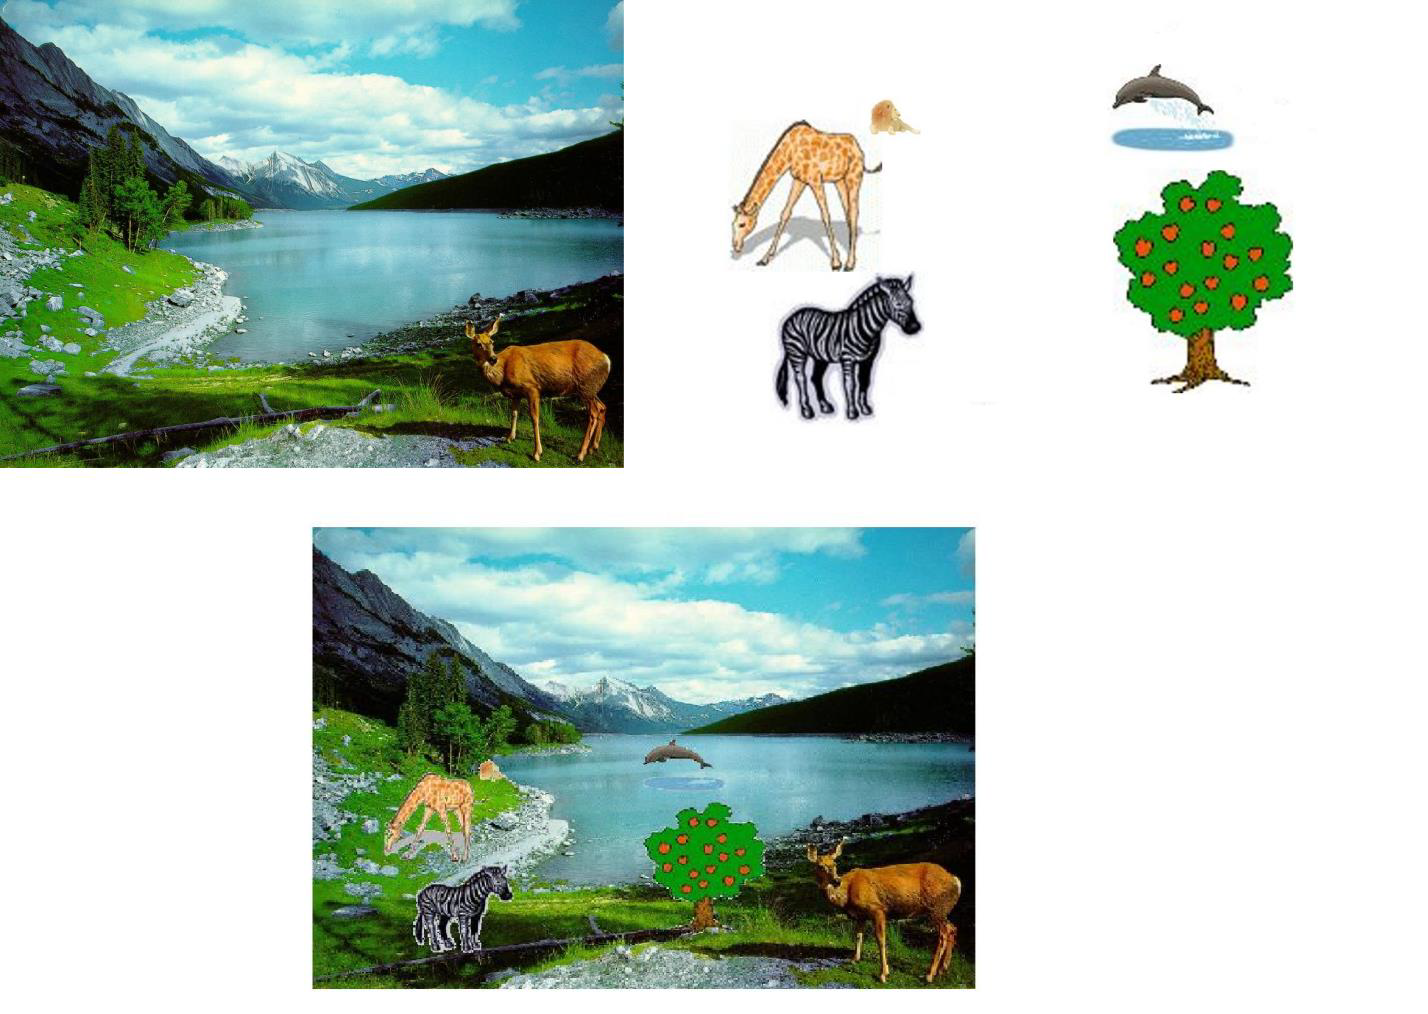

Wall time: 431 ms


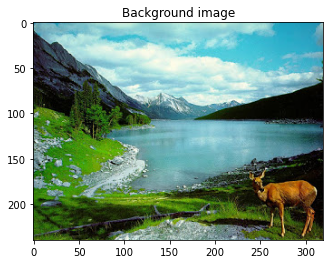

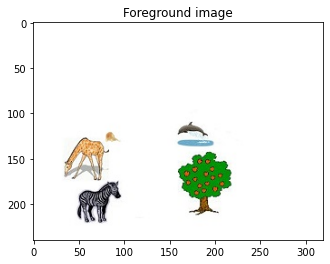

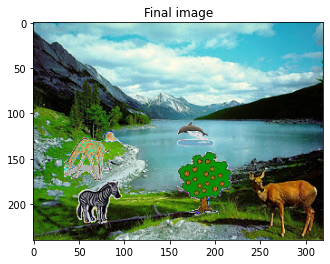

In [73]:
%%time

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

background = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/img61.jpg")
img1 = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/img61.jpg")
img2 = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/Sample_Image.jpg")
#YOUR CODE STARTS HERE
shape = img1.shape
for i in range(shape[0]) :
    for j in range(shape[1]) :
        for k in range(shape[2]) :
            ## So if foreground image isn't white pixel then I'll replace background pixel with foreground pixel at this location
            if(img2[i][j][k] < 240) :              
                img1[i][j][k] = img2[i][j][k] 
                

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

background = cv2.cvtColor(background,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Background image")
plt.imshow(background)

plt.figure()
plt.title("Foreground image")
plt.imshow(img2)

plt.figure()
plt.title("Final image")
plt.imshow(img1)

#YOUR CODE ENDS HERE

# mask=cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
# mask_inv=cv2.cvtColor(mask_inv,cv2.COLOR_BGR2RGB)
# img_background=cv2.cvtColor(img_background,cv2.COLOR_BGR2RGB)
# img_foreground=cv2.cvtColor(img_foreground,cv2.COLOR_BGR2RGB)
# res_img=cv2.cvtColor(res_img,cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(16,12))
# plt.subplot(2,2,1)
# plt.imshow(mask)
# plt.title('Mask Image')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,2,2)
# plt.imshow(mask_inv)
# plt.title('Inverse Mask Image')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,2,3)
# plt.imshow(img_background)
# plt.title('Image background')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(2,2,4)
# plt.imshow(img_foreground)
# plt.title('Image foreground')
# plt.xticks([])
# plt.yticks([])
# plt.figure(figsize=(10,8))
# plt.subplot(1,1,1)
# plt.imshow(res_img)
# plt.title('Composite Image')
# plt.xticks([])
# plt.yticks([])

<span style='color:red'>2Q. Implement a function domIntensity(im, k), which takes an image im and an integer k and returns a list of k most dominant intensities of that image. Experiment your code on any 3 images to validate the program output.</span>

[155, 156, 154, 153, 157, 129, 144, 143, 158, 145]
[90, 91, 89, 95, 88, 92, 87]
[244, 243, 245, 241, 242, 240, 239, 246, 238, 237, 213, 235, 236, 234, 230]


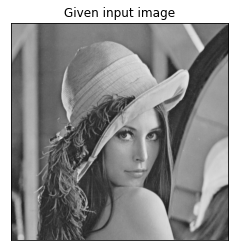

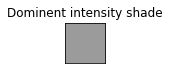

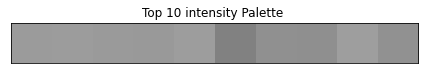

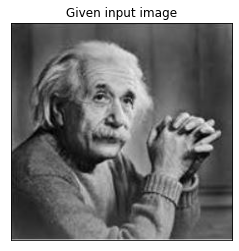

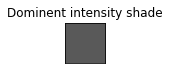

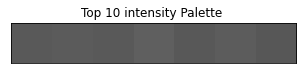

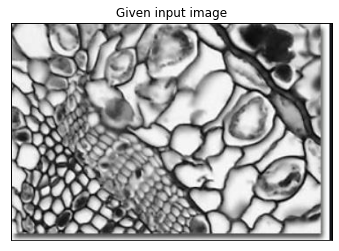

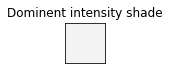

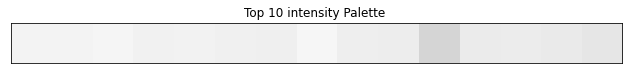

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import operator
%matplotlib inline

def domIntensity(im, k):
    #YOUR CODE STARTS HERE
    
    ## This dictionary will store my histogram
    intense_count = {}
    for i in range(256) : 
        intense_count[i] = 0 
    
    img_shape = im.shape 
    #print(img_shape)
    
    for x in range(img_shape[0]) :
        for y in range(img_shape[1]) :
            for z in range(img_shape[2]) :
                intense_count[im[x][y][z]] += 1
    
    ## Sorting my dictionary to get most dominant intensities
    intense_count = dict( sorted(intense_count.items(), key=operator.itemgetter(1),reverse=True))
    
    sorted_intensities = [0 for i in range(256)] 
    #print(intense_count)
    counter =  0 
    
    ## Storing all intensities according to their dominance (in descending order)
    for key in intense_count :
        sorted_intensities[counter] = key 
        counter += 1 
    
    print(sorted_intensities[:k])
    #YOUR CODE ENDS HERE
    return sorted_intensities[:k]

def displayIntensityPalette(im, dom_list):
    plt.figure()
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray", vmin=0, vmax=255)
    else:
        plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    plt.title("Given input image")
    k = len(dom_list)
    
    # Most dominant intensity
    top_im = np.array([list([dom_list[0]])])
    plt.figure(figsize = (0.75,0.75), frameon=False)
    plt.imshow(top_im,cmap = "gray", vmin=0, vmax=255)
    plt.title('Dominent intensity shade')
    plt.xticks([])
    plt.yticks([])
    
    # k most dominant intensity palette
    plt.figure(figsize = ((0.75*k),0.75), frameon=False)
    dom_inty_im = np.array([[dom_list[i] for i in range(k)]])
    plt.imshow(dom_inty_im,cmap = "gray", vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    plt.title("Top 10 intensity Palette ")

im = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/lena_gray_256.tif")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
dom_list = domIntensity(im,10)
displayIntensityPalette(im, dom_list)

im2 = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/second_sample2.jpg")
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
dom_list = domIntensity(im2,7)
displayIntensityPalette(im2, dom_list)

im3 = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/second_sample3.jpg")
im3 = cv2.cvtColor(im3,cv2.COLOR_BGR2RGB)
dom_list = domIntensity(im3,15)
displayIntensityPalette(im3, dom_list)

<span style='color:red'>3Q. Write a function <span style='color:blue'>histogramEqualization(image)</span> to stretch the image contrast. Using this function enhance the images histogram1.jpg, histogram2.jpg and histogram3.jpg and compare it with inbuilt function results. Record the observations.</span> 

<Figure size 1152x864 with 0 Axes>

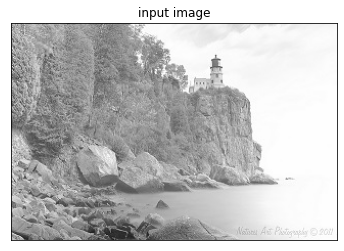

<Figure size 1152x864 with 0 Axes>

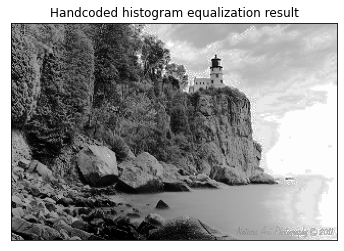

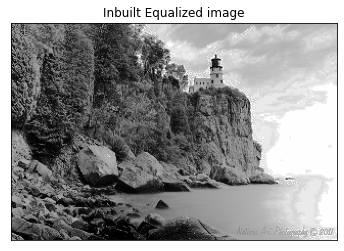

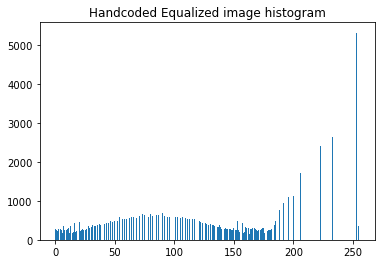

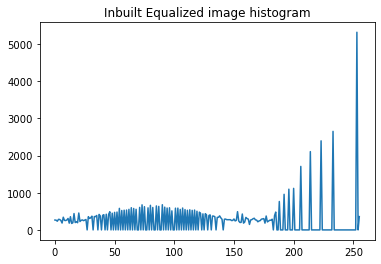

<Figure size 1152x864 with 0 Axes>

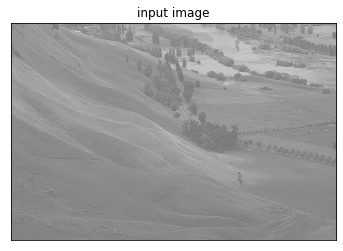

<Figure size 1152x864 with 0 Axes>

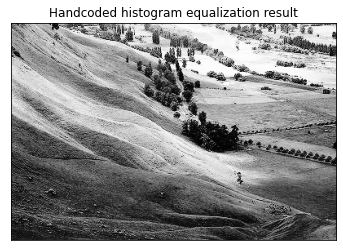

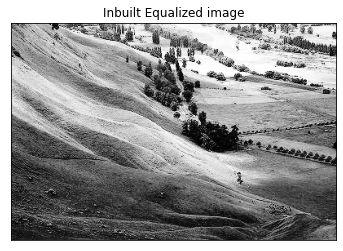

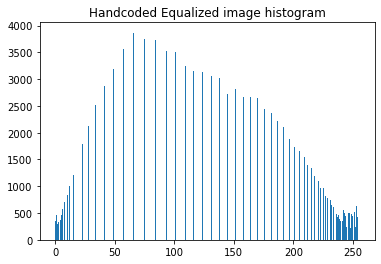

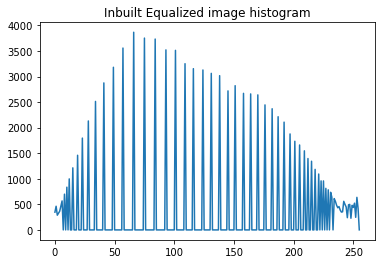

<Figure size 1152x864 with 0 Axes>

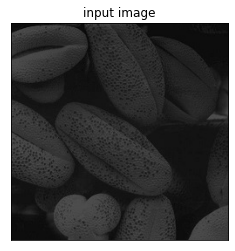

<Figure size 1152x864 with 0 Axes>

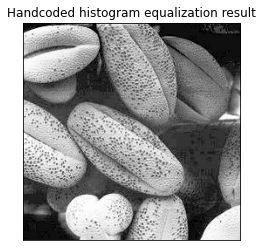

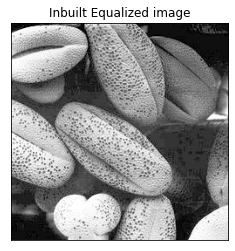

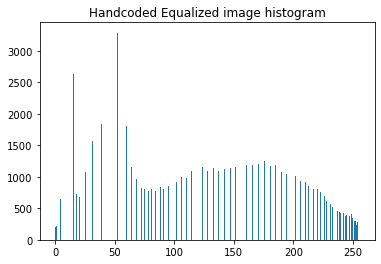

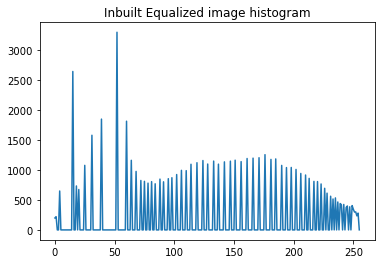

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy as np 
%matplotlib inline

def plotHistogram(im):
    #YOUR CODE STARTS HERE
    
    ## imgHist is my histogram 
    imgHist = [0 for i in range(256)]
    #print(im.shape)
    for x in range(im.shape[0]) :
        for y in range(im.shape[1]) :
            imgHist[im[x][y]] += 1 
    

    #YOUR CODE ENDS HERE
    return imgHist

def histogramEqualization(im):
    #YOUR CODE STARTS HERE
    
    hist = plotHistogram(im) 
    #print(hist)
    hist = np.array(hist) 
    
    sum_all = [sum(hist[:i+1]) for i in range(len(hist))]
    sum_all = np.array(sum_all)
    ##Now normalising the summation of pixels values 
    
    sum_i = (sum_all - sum_all.min()) * 255
    N = sum_all.max() - sum_all.min()

    # re-normalize the cumsum
    sum_all = sum_i / N                  ### 0 to 255 
    
    sum_all = np.uint8(sum_all) 
    
    im_new = [[0 for i in range(im.shape[1])] for j in range(im.shape[0])] 
    
    for i in range(im.shape[0]) :
        for j in range(im.shape[1]) :
            im_new[i][j] = sum_all[im[i][j]]


    #YOUR CODE ENDS HERE
    im_new = np.array(im_new)
    return im_new

hist1 = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/histogram1.jpg',0)
hist11 =cv2.cvtColor(hist1,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(hist11)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(hist1)
hist = plotHistogram(eq_img)
eq_img = cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(hist1)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
plt.bar(range(256),hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()




hist2 = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/histogram2.jpg',0)
hist22 =cv2.cvtColor(hist2,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(hist22)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(hist2)
hist = plotHistogram(eq_img)
eq_img = cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(hist2)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
plt.bar(range(256),hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()



hist3 = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/histogram3.jpg',0)
hist33 =cv2.cvtColor(hist3,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.figure()
plt.title("input image")
plt.imshow(hist33)
plt.xticks([])
plt.yticks([])

# Implemented
eq_img= histogramEqualization(hist3)
hist = plotHistogram(eq_img)
eq_img = cv2.cvtColor(eq_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16,12))
plt.figure()
plt.title("Handcoded histogram equalization result")
plt.imshow(eq_img)
plt.xticks([])
plt.yticks([])

#inbuilt
inbuilt_hist_img=cv2.equalizeHist(hist3)
inbuilt_hist = cv2.calcHist([eq_img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Inbuilt Equalized image")
plt.imshow(inbuilt_hist_img, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.figure()
plt.title("Handcoded Equalized image histogram")
plt.bar(range(256),hist)
plt.show()
plt.figure()
plt.title("Inbuilt Equalized image histogram")
plt.plot(inbuilt_hist)
plt.show()




<span style='color:red'>4Q.Images of outdoor scenes are often degraded by haze (due to fog, dust, etc). Light is attenuated by its passage through the atmosphere, and additional unwanted scattered light is added. We want to enhance the images to remove the effect of the haze. Look at input histograms of images “haze1.tif” and “haze2.tif”. Let’s assume that the pixels in the degraded image that have the lowest values (in each color band) actually should be pure black, and the pixels that have the highest values (in each color band) are actually should be pure white. A simple de-hazing algorithm is to take a color image, and for each band (red, green, blue), stretch its values to occupy the full range (0 to 255), such that 1% of data at the extreme ends is saturated at the low and high values (see Matlab’s “imadjust”). Then put the bands back together into an RGB image. Implement this algorithm and test it on the given images.</span>

Wall time: 15.2 s


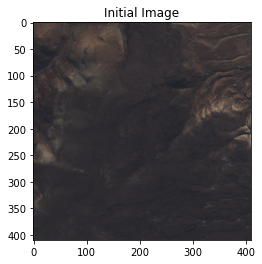

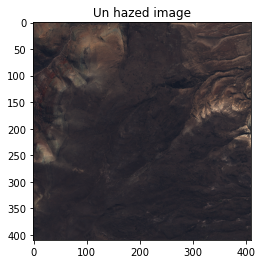

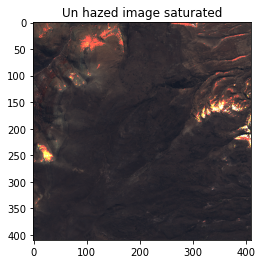

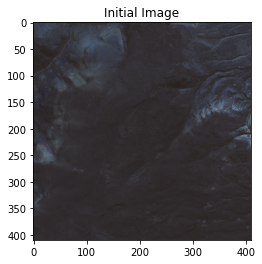

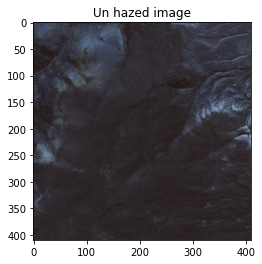

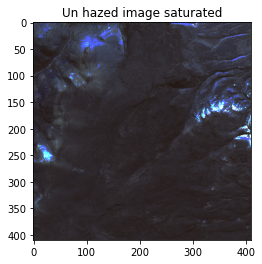

In [31]:
%%time

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE

def unhazing(im) :
    new_im = np.array([[[0,0,0] for i in range(im.shape[1])] for j in range(im.shape[0])])
    new_im_sat = np.array([[[0,0,0] for i in range(im.shape[1])] for j in range(im.shape[0])])


    # print(np.percentile(new_im,1))
    # print(np.percentile(new_im,99))
    # print(new_im.min())
    # print(new_im.max())

    ## Streching the image to full pixel value range of (0,255)
    for x in range(im.shape[0]) :
        for y in range(im.shape[1]) :
            for z in range(3) :
                new_im[x][y][z] = ((im[x][y][z] - Min)/(Max - Min))*255 

    lower = np.percentile(new_im,1)
    high = np.percentile(new_im,99)

    ## Now saturating the extreme 1% data ,i.e lower extreme to lower values and upper extreme to upper value
    for x in range(im.shape[0]) :
        for y in range(im.shape[1]) :
            for z in range(3) : 
                if(new_im[x][y][z] <= lower) :
                    new_im_sat[x][y][z] =  new_im.min()
                if(new_im[x][y][z] >= high) :
                    new_im_sat[x][y][z] = new_im.max()
                else :
                    new_im_sat[x][y][z] = new_im[x][y][z]




    



    plt.figure()
    plt.title("Initial Image")
    plt.imshow(im)

    plt.figure()
    plt.title("Un hazed image")
    plt.imshow(new_im)

    plt.figure()
    plt.title("Un hazed image saturated")
    plt.imshow(new_im_sat)

im = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/haze1.tif') 
im =cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

im2 = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/haze2.tif') 
im2 =cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

unhazing(im) 
unhazing(im2)


    
    
# YOUR CODE ENDS HERE

<span style='color:red'>5Q. Try to enhance the ‘skeleton.jpg’ image by performing the sequence of operations given as comments in the program. make note of the observations in each step. </span>
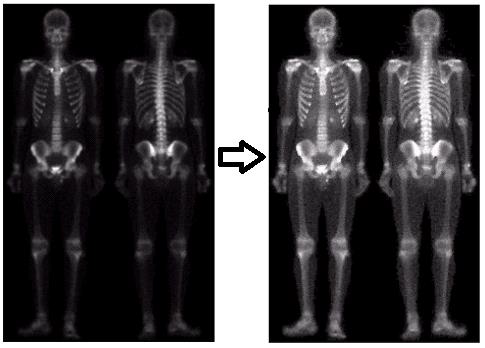

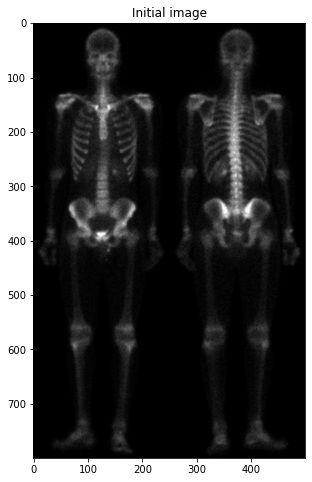

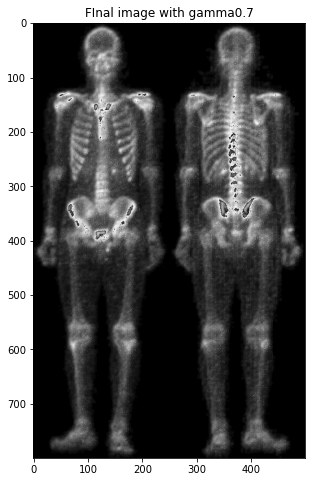

In [65]:
# Question 5: Sequence of steps to enhance the image.

#1. (a).read image of whole body bone scan.
#2. (b) Laplacian of (a).
#3. (c) Sharpened image obtained by adding (a) and (b).
#4. (d) Sobel gradient of image (a).
#5. (e) Sobel image smoothed with a 5 × 5 box filter.
#6. (f) Mask image formed by the product of (b) and (e).
#7. (g) Sharpened image obtained by the adding images (a) and (f).
#8. (h) Final result obtained by applying a power-law transformation to (g).

#YOUR CODE STARTS HERE

im = cv2.imread("D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/skeleton.tif")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
laplacian = cv2.Laplacian(im,-1*cv2.CV_64F)                   
laplacian1 = np.uint8((laplacian/(laplacian.max() - laplacian.min()))*255)                  #######B 
sharp_img = im + laplacian1  ############C 


sobelx = cv2.Sobel(im,-1*cv2.CV_64F,1,0) 
sobely = cv2.Sobel(im,-1*cv2.CV_64F,0,1) 

sobelCombined = cv2.bitwise_or(sobelx, sobely)              ################# D
 
sobelCombined =  cv2.boxFilter(sobelCombined,-1*cv2.CV_64F,(5,5))       ########################### E  


mask =  cv2.bitwise_or(laplacian1,sobelCombined)              ###################### F

sharpened_img_final = im + mask                               ###################### G


gamma = 0.70       
# Apply gamma correction. 
final_img = np.array(255*(sharpened_img_final/ 255) **gamma, dtype = 'uint8')  ############################ H
plt.figure(figsize=(8,8))
plt.title("Initial image")
plt.imshow(im)
plt.figure(figsize=(8,8))
plt.title("FInal image with gamma"+ str(gamma))
plt.imshow(final_img)


#YOUR CODE ENDS HERE

<span style='color:red'>6Q. Write a program to find the largest correlation spot in the given image (hills.jpg) using linear filtering based template matching technique. Draw rectangular bounding box at the detected template (template.png) matched locations.</span>

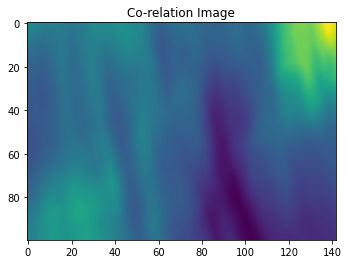

0.282034950626098


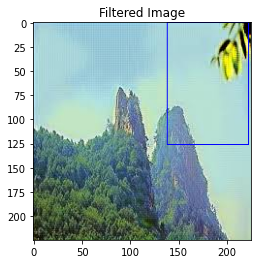

Wall time: 3.96 s


In [74]:
%%time

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
from numpy import unravel_index
%matplotlib inline


# Implement Linear Filtering technique on an image using a linear filter #correlation
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    #print("Inside func")
    #image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]

    #filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = [[0 for j in range(result_width)] for i in range(result_height)]
    # YOUR CODE STARTS HERE

    #print("Entering")
    
    ## Calculating and storing the correlation matrix in result 
    for i in range(result_height) :
        for j in range(result_width) :
            try :
               
                result[i][j] = np.float(np.corrcoef(np.array(filter_).ravel(), np.array(image[i:i+filter_height , j:j+filter_width]).ravel())[0,1])
                
            except :
                print(i,j)
                
    plt.imshow(result)
    plt.title('Co-relation Image')
    plt.show()
    
    #Convertingf result to np.array
    result = np.array(result)  
    print(result.max()) 
    
    color = (0, 0, 255) 
  
    # Line thickness of 2 px 
    thickness = 1
    
    ##Finding the point of maximum co-relation
    startt_point = unravel_index(result.argmax(), result.shape)
    #print(startt_point)
    
    ## Calculating the end-point/diagonal point with given start point and height and width
    end_point = (startt_point[1] + filter_width , startt_point[0] + filter_height) 
    start_point = (startt_point[1],startt_point[0])
    #print(start_point)
    #print(end_point)
    
    #Final result with a box in the region which matched with the template
    result = cv2.rectangle(image, start_point, end_point, color, thickness) 
    # YOUR CODE ENDS HERE
    return result



# To test your implementation, run the below code.
image = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/hills.jpeg')
filter_ = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/template.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
filter_ = cv2.cvtColor(filter_,cv2.COLOR_BGR2RGB)
#print("Done")
#print("Done2")
result = linear_filter(image, filter_)

plt.imshow(result)
plt.title('Filtered Image')
plt.show()

<span style='color:red'>7Q. Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max. For the given noise images. Apply the appropriate filter to enhance the image quality. use images Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs.</span> 

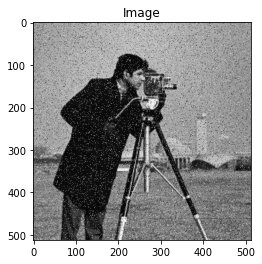

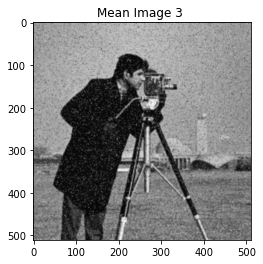

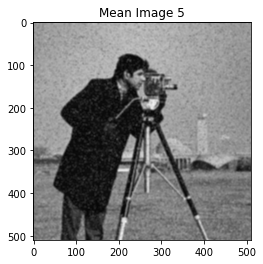

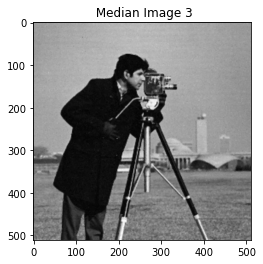

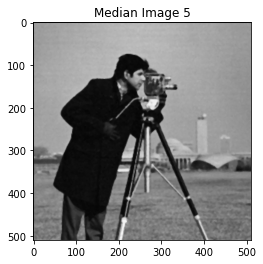

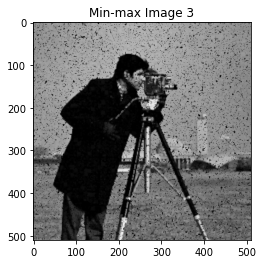

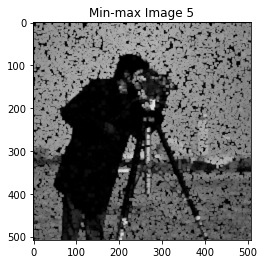

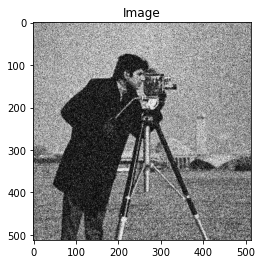

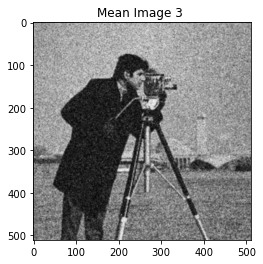

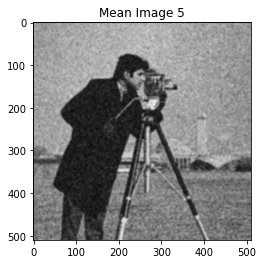

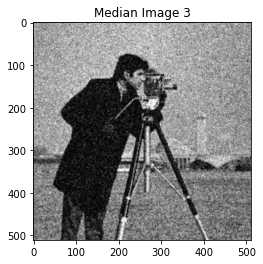

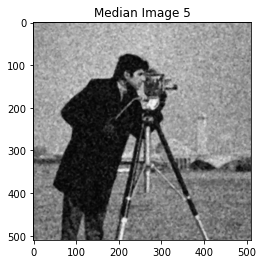

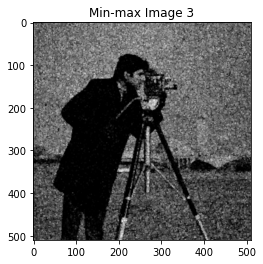

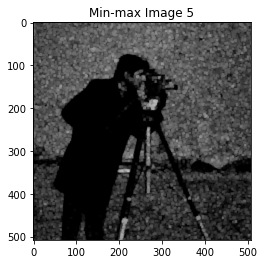

Wall time: 2min 28s


In [70]:
%%time

import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

#YOUR CODE STARTS HERE

def mean_calc(filter1,image) :
    return np.sum(np.multiply(image, filter1))

def median_calc(image) :
    return np.median(image)

def max_calc(image) :
    return np.max(image)

def min_calc(image) :
    return np.min(image)


def mean_filter3(image) :
    
    filter = [[1/9 for i in range(3)] for j in range(3)]
    
    result_img = [[[0,0,0] for i in range(image.shape[1] - 1)] for j in range(image.shape[0] - 1)]
    for i in range(1,image.shape[0] - 1) :
        for j in range(1,image.shape[1]-1) :
            for k in range(3) :
                val = np.uint8(mean_calc(filter,image[i-1:i+2,j-1:j+2,k]))
                #print(val)
                result_img[i][j][k] = val 
    return result_img


def mean_filter5(image) :
    filter = [[1/25 for i in range(5)] for j in range(5)]        #### 5*5 each value as 1/25
    result_img = [[[0,0,0] for i in range(image.shape[1] - 2)] for j in range(image.shape[0] - 2)]
    for i in range(2,image.shape[0] - 2) :
        for j in range(2,image.shape[1] - 2) :
            for k in range(3) :
                
                val = np.uint8(mean_calc(filter,image[i-2:i+3,j-2:j+3,k]))
                result_img[i][j][k] = val 
    return result_img


def median_filter3(image) :
    result_img = [[[0,0,0] for i in range(image.shape[1] - 1)] for j in range(image.shape[0] - 1)]
    for i in range(1,image.shape[0] - 1) :
        for j in range(1,image.shape[1]-1) :
            for k in range(3) :
                val = np.uint8(median_calc(image[i-1:i+2,j-1:j+2,k]))
                #print(val)
                result_img[i][j][k] = val 
    return result_img
    
def median_filter5(image) :
    
    result_img = [[[0,0,0] for i in range(image.shape[1] - 2)] for j in range(image.shape[0] - 2)]
    for i in range(2,image.shape[0] - 2) :
        for j in range(2,image.shape[1] - 2) :
            for k in range(3) :
                
                val = np.uint8(median_calc(image[i-2:i+3,j-2:j+3,k]))
                result_img[i][j][k] = val 
    return result_img    


def max_filter3(image) :
    result_img = [[[0,0,0] for i in range(image.shape[1] - 1)] for j in range(image.shape[0] - 1)]
    for i in range(1,image.shape[0] - 1) :
        for j in range(1,image.shape[1]-1) :
            for k in range(3) :
                val = np.uint8(max_calc(image[i-1:i+2,j-1:j+2,k]))
                #print(val)
                result_img[i][j][k] = val 
    return result_img
    
def max_filter5(image) :
    
    result_img = [[[0,0,0] for i in range(image.shape[1] - 2)] for j in range(image.shape[0] - 2)]
    for i in range(2,image.shape[0] - 2) :
        for j in range(2,image.shape[1] - 2) :
            for k in range(3) :
                
                val = np.uint8(max_calc(image[i-2:i+3,j-2:j+3,k]))
                result_img[i][j][k] = val 
    return result_img    


def min_filter3(image) :
    result_img = [[[0,0,0] for i in range(image.shape[1] - 1)] for j in range(image.shape[0] - 1)]
    for i in range(1,image.shape[0] - 1) :
        for j in range(1,image.shape[1]-1) :
            for k in range(3) :
                val = np.uint8(min_calc(image[i-1:i+2,j-1:j+2,k]))
                #print(val)
                result_img[i][j][k] = val 
    return result_img
    
def min_filter5(image) :
    
    result_img = [[[0,0,0] for i in range(image.shape[1] - 2)] for j in range(image.shape[0] - 2)]
    for i in range(2,image.shape[0] - 2) :
        for j in range(2,image.shape[1] - 2) :
            for k in range(3) :
                
                val = np.uint8(min_calc(image[i-2:i+3,j-2:j+3,k]))
                result_img[i][j][k] = val 
    return result_img    



def min_max3(image) :
    
    im_min = np.array(min_filter3(image))
    
    return max_filter3(im_min)


def min_max5(image) :
        
    im_min = np.array(min_filter5(image))
    
    return max_filter5(im_min)


    

image1 = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/Cameraman_SandP_0.08.jpg')
image1_mean3 = mean_filter3(image1)
image1_mean5 = mean_filter5(image1)

image1_median3 = median_filter3(image1)
image1_median5 = median_filter5(image1)

image1_min_max3 = min_max3(image1)
image1_min_max5 = min_max5(image1)

plt.imshow(image1)
plt.title('Image')
plt.show()

plt.imshow(image1_mean3)
plt.title('Mean Image 3 ')
plt.show()

plt.imshow(image1_mean5)
plt.title('Mean Image 5')
plt.show()

plt.imshow(image1_median3)
plt.title(' Median Image 3')
plt.show()

plt.imshow(image1_median5)
plt.title('Median Image 5')
plt.show()

plt.imshow(image1_min_max3)
plt.title('Min-max Image 3')
plt.show()

plt.imshow(image1_min_max5)
plt.title('Min-max Image 5')
plt.show()



image2 = cv2.imread('D:/Anaconda_code/IVP Assignment/Assignment-1_images/Assignment-1_images/Camerman_G_0.05.jpg')
image2_mean3 = mean_filter3(image2)
image2_mean5 = mean_filter5(image2)
image2_median3 = median_filter3(image2)
image2_median5 = median_filter5(image2)
image2_min_max3 = min_max3(image2)
image2_min_max5 = min_max5(image2)


plt.imshow(image2)
plt.title('Image')
plt.show()
plt.imshow(image2_mean3)
plt.title('Mean Image 3 ')
plt.show()
plt.imshow(image2_mean5)
plt.title('Mean Image 5')
plt.show()
plt.imshow(image2_median3)
plt.title('Median Image 3')
plt.show()
plt.imshow(image2_median5)
plt.title('Median Image 5')
plt.show()

plt.imshow(image2_min_max3)
plt.title('Min-max Image 3')
plt.show()

plt.imshow(image2_min_max5)
plt.title('Min-max Image 5')
plt.show()

#YOUR CODE ENDS HERE